<a href="https://colab.research.google.com/github/samsee/hgmldl2023/blob/main/hgmldl2023_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4장. 다양한 분류 알고리즘

## 로지스틱 회귀

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
fish.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [ ]:
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:
# 데이터 준비
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [ ]:
# 전처리-스케일 정규화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# kNN 훈련 고고
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


### 다중 분류 문제

In [ ]:
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [ ]:
# 타겟 매핑
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [ ]:
# 위에 타겟 매핑이 아래 표의 제목임
# 샘플별 클래스 확률
import numpy as np

np.round(kn.predict_proba(test_scaled[:5]), decimals=4)

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

### 로지스틱 회귀

* 이름은 회귀지만 분류 문제에 사용.
* 선형 회귀와 마찬가지로 선형 방정식을 통해 학습

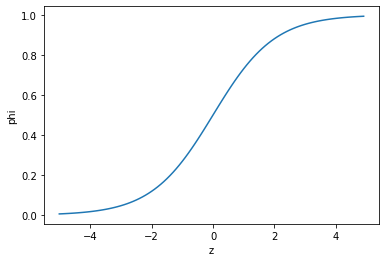

In [ ]:
# 시그모이드 함수 시각화
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z)) # 시그모이드 함수
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

#### 이진 분류 해보기

* 예제 데이터 중 Bream과 Smelt만 분류하는 모델

In [ ]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt') # 조건 필터링
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
print(lr.predict(train_bream_smelt[:5]))
print(lr.predict_proba(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [ ]:
lr.decision_function(train_bream_smelt[:5])

array([-6.02927744,  3.57123907, -5.26568906, -4.24321775, -6.0607117 ])

In [ ]:
# 시그모이드 적용
from scipy.special import expit
print(expit(lr.decision_function(train_bream_smelt[:5])))
# predict_proba 와 같은 결과임.

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


### 다중 분류

* 로지스틱 회귀는 반복적인 알고리즘, max_iter=100 param
  * ❓왜 반복할까? 같은 데이터셋으로 반복하는 것인가? 
* 규제 : 릿지 회귀처럼 계수의 제곱을 규제함. L2 규제. C param. 릿지 회귀의 alpha와는 반대로 작을 수록 규제가 강해짐.

In [ ]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
# 예측
print(lr.predict(test_scaled[:5]))
proba = lr.predict_proba(test_scaled[:5])
print(lr.classes_)
print(np.round(proba, decimals=3))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
print(lr.classes_)
print(lr.coef_)
print(lr.intercept_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[-1.49002087 -1.02912886  2.59345551  7.70357682 -1.2007011 ]
 [ 0.19618235 -2.01068181 -3.77976834  6.50491489 -1.99482722]
 [ 3.56279745  6.34357182 -8.48971143 -5.75757348  3.79307308]
 [-0.10458098  3.60319431  3.93067812 -3.61736674 -1.75069691]
 [-1.40061442 -6.07503434  5.25969314 -0.87220069  1.86043659]
 [-1.38526214  1.49214574  1.39226167 -5.67734118 -4.40097523]
 [ 0.62149861 -2.32406685 -0.90660867  1.71599038  3.6936908 ]]
[-0.09205179 -0.26290885  3.25101327 -0.14742956  2.65498283 -6.78782948
  1.38422358]


In [ ]:
# 소프트맥스 적용 톺아보기
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))
# predict_proba 와 같은 값

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


### 미션 : 04-1 2번 문제

* 로지스틱 회귀가 이진 분류에서 확률을 출력하기 위해 사용하는 함수는?
  * 시그모이드 함수
  * 로지스틱 회귀 알고리즘이 찾아낸 선형 방정식(모델)의 출력 값을 0~1 사이의 값으로 바꾸는 역할을 함.
  * 0~1 사이의 값을 확률로 사용. 양성(또는 음성)일 확률.

## 확률적 경사 하강법

* 상황
  * 훈련 데이터가 조금씩 제공된다면?
  * 매번 모든 데이터로 훈련 하기에는 데이터 셋이 너무 크다면?
* 점진적 학습(or 온라인 학습)
  * **확률적 경사 하강법**은 대표적 점진적 학습 알고리즘
  * 조금씩 학습하자(학습률) + 쪼개서 학습하자(확률적)
  * 쪼개는 방법에 따라..
    * 확률적(Stochastic) : 랜덤하게 하나씩
    * 미니배치(Minibatch) : 몇개
    * 배치(Batch) : 훈련 세트 한 번에
* 손실 함수
  * 잘 맞출 수록 작은 값이 나오는 함수
  * 로지스틱 손실
  * 크로스 엔트로피 손실
  * MSE

### SGDClassifier

* 확률적 경사 하강법 분류기

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)


In [2]:
# 그냥 만들어본 편의 함수
def load_data_and_split(url, inputs: list, target, random_state=42):
  import pandas as pd

  fish = pd.read_csv(url)
  fish_input = fish[inputs].to_numpy()
  fish_target = fish[target].to_numpy()
  from sklearn.model_selection import train_test_split

  return train_test_split(fish_input, fish_target, random_state=random_state)

In [3]:
train_input, test_input, train_target, test_target = load_data_and_split(
    'https://bit.ly/fish_csv_data', 
    ['Weight','Length','Diagonal','Height','Width'], 
    'Species'
)

In [4]:
# 전처리
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [5]:
# 훈련
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [6]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


### 에포크와 과대적합, 과소적합

In [7]:
import numpy as np

sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

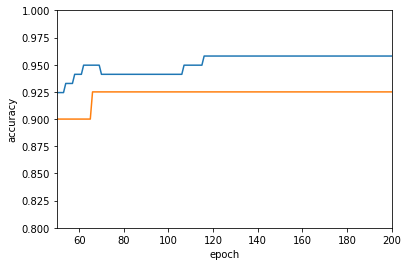

In [8]:
# 300번 학습
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.xlim([50, 200])
plt.ylim([0.8, 1])
plt.show()
# 100정도가 적당한 것으로 결론.. 훈련세트-테스트세트 점수 차이도 크게 안 나고..

### 힌지 손실(hinge loss)

* SGDCliassifier의 기본 손실함수
* SVM(Support Vector Machine) 알고리즘에서 사용
* 수식은 : $\ell(y) = \max(0, 1-t \cdot y)$ 이거래
* https://en.wikipedia.org/wiki/Hinge_loss

In [9]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
